In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
df=pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [32]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [36]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()
Q1=df['charges'].quantile(0.25)
Q3=df['charges'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=(df['charges']<lower_bound)|(df['charges']>upper_bound)
clean_insurance=df.loc[~outliers].reset_index(drop=True)
print(len(clean_insurance))
print(clean_insurance)

1198
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1193   50    male  30.970         3     no  northwest  10600.54830
1194   18  female  31.920         0     no  northeast   2205.98080
1195   18  female  36.850         0     no  southeast   1629.83350
1196   21  female  25.800         0     no  southwest   2007.94500
1197   61  female  29.070         0    yes  northwest  29141.36030

[1198 rows x 7 columns]


In [38]:
print(clean_insurance.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


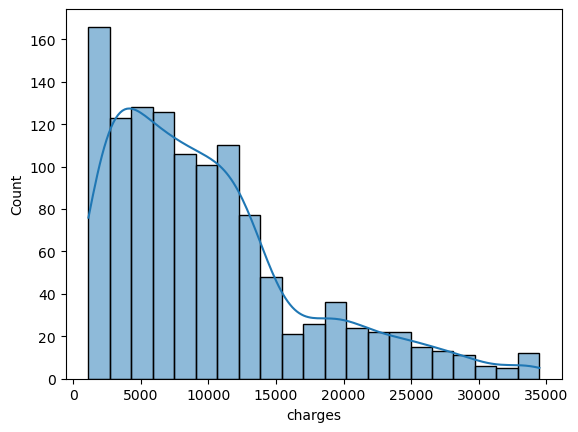

In [40]:
sns.histplot(clean_insurance['charges'], kde=True)
plt.show()

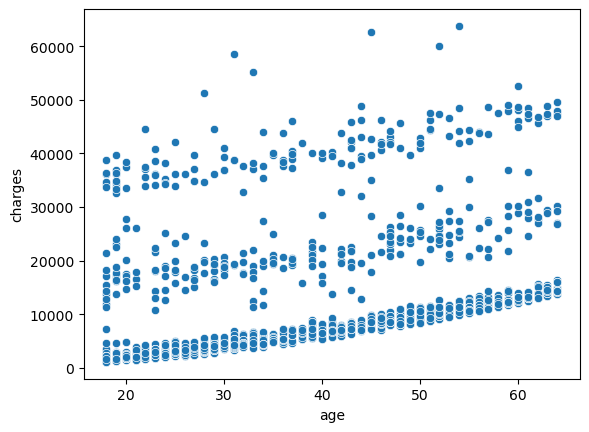

In [ ]:
sns.scatterplot(data=df, x='age', y='charges')
plt.show()
sns.scatterplot(data=df, x='bmi', y='charges')
plt.show()
sns.scatterplot(data=df, x='children', y='charges')
plt.show()

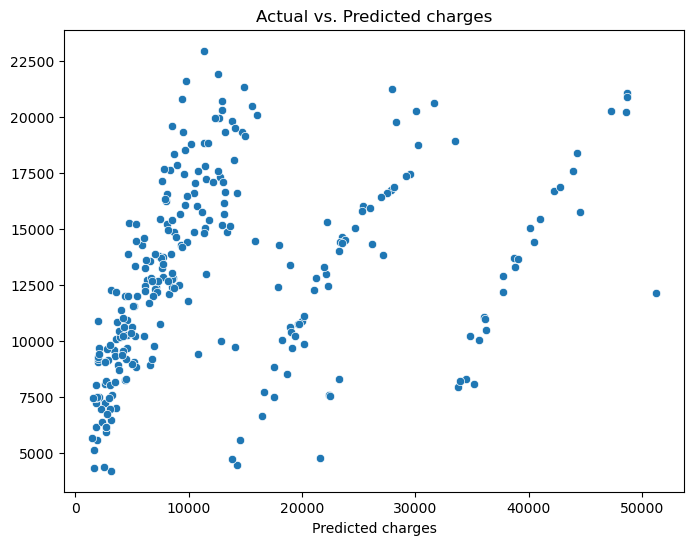

Intercept: -6796.694578228022
Coefficient: [245.81105368 315.94769344 545.54656464]
R-squared(R2): 0.12421084690429707
Mean Squared Error (MSE): 118047886.25259434


In [24]:
X=df[['age', 'bmi', 'children']]
y=df['charges']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
print('R-squared(R2):', r2)
print('Mean Squared Error (MSE):', mse)